# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, we initialise and run a Traffic sign classifier

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

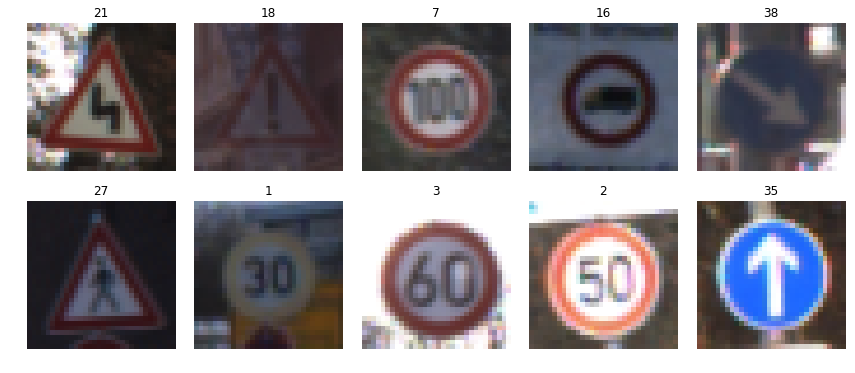

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
fig,axs=plt.subplots(2,5,figsize=(15,6))
fig.subplots_adjust(hspace=.2,wspace=0.001)
axs=axs.ravel()
# axs gives you subplot handles in an array
for i in range(10):
    index=random.randint(0,len(X_train))
    image=X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

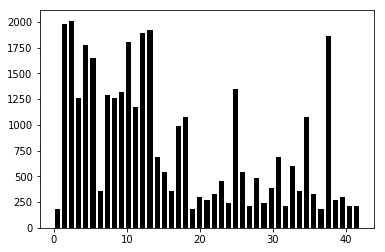

In [4]:
# histogram of label freq
hist,bins = np.histogram(y_train,bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=0.7,color='Black')
plt.show()

# Augment data Training
Since the distribution of training data is skewed we need to augment to reduxe training bias


In [5]:
# we will have four functions
import cv2 as cv2

def translate(image):
    # this function moves pixels randomly
    #print("translate")
    row,col,_=image.shape
    
    max=3
    x,y=np.random.randint(-max,max,2)
    T=np.float32([[1,0,x],[0,1,y]])
    dst=cv2.warpAffine(image,T,(col,row))
    #dst =dst[:,:,np.newaxis]
    #print (dst.shape)
    return dst

def rotate(image, angle=15):
    angle = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))

def brighten(image):
    #print("brighten")
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    value= np.random.randint(0,30)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    #print(img.shape)
    return img
    
def generate(image):
    output=brighten(image)
    output=rotate(output)
    output=translate(output)
    return output


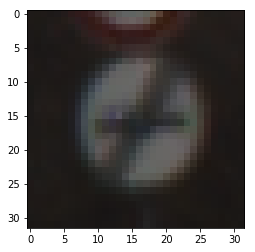

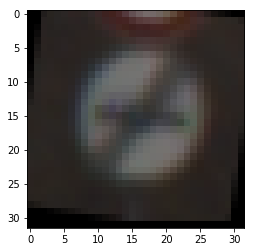

In [6]:
plt.imshow(X_train[5])
plt.show()
new=generate(X_train[5])
plt.imshow(new)
plt.show()


In [7]:

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    print(class_n, ': ', end='')
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            new_img = X_train[class_indices[0][i % n_samples]]
            new_img = generate(new_img)
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
print('done')

0 : |----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|
15 : |----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|---
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---
28 : |----|----|----|----|----|----|-
29 : |----|----|----|----|----|----|----|----|----|----|----|
30 : |----|----|----|----|----|----|----|----|
31 : |----|----|
32 : |----|----|----|----|----|----|----|----|----|----|----|---
33 : |----|----|----|----|
34 : |----|

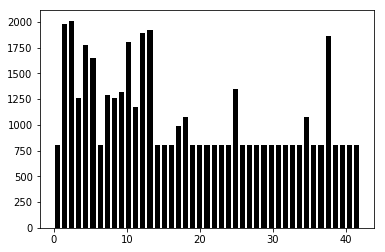

In [8]:
# histogram of label freq
hist,bins = np.histogram(y_train,bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=0.7,color='Black')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normaliseImage(image,n=2,flag=False):
    rgb_weights=[0.5870,0.29,0.1140]
    grayscale_image=np.dot(image[...,:3],rgb_weights)
    normal_gray = (grayscale_image-128)/128
    if flag:
        normal_gray=normal_gray[..., np.newaxis]
    return normal_gray

def normaliseImage1(image,n=2,flag=False):
    grayscale_image=np.sum(image/n,axis=n,keepdims=flag)
    normal_gray = (grayscale_image-128)/128
    return normal_gray

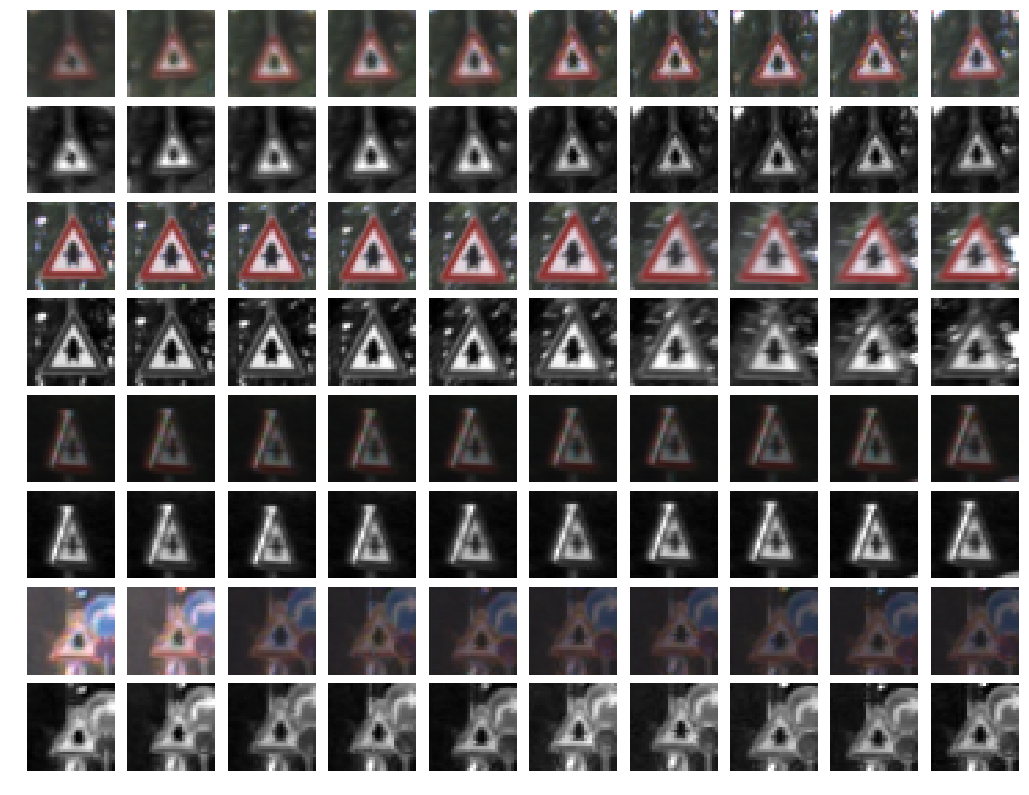

In [10]:
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train[index + offset - n_cols].squeeze()
        image=normaliseImage1(image)

        axs[index].axis('off')
        axs[index].imshow(image,cmap='gray')



In [11]:
# normalise the dataset test and validation

# train
X_train_rgb = X_train
X_train_gray=normaliseImage1(X_train,3,True)
X_train=X_train_gray
X_train
print(X_train.shape)
# validation
X_valid_rgb = X_valid
X_valid_gray = normaliseImage1(X_valid,3,True)
X_valid=X_valid_gray
print(X_valid.shape)

#test
X_test_rgb= X_test
X_test_gray = normaliseImage(X_test,3,True)
X_test=X_test_gray
print(X_test.shape)



(46480, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# macro parameters here
Epochs=60
BATCH_SIZE=128
rate=0.0009

In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    mu =0
    sigma = 0.1
   
    
    # layer 1 Input = 32x32x1. Output = 28x28x6. Pooling. Input = 28x28x6. Output = 14x14x6.
    con1_w=tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma))
    con1_b=tf.Variable(tf.zeros(6))
    con1=tf.nn.conv2d(x,con1_w,strides=[1,1,1,1],padding='VALID')+con1_b
    con1=tf.nn.relu(con1)
    con1=tf.nn.max_pool(con1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
       
    # layer 2 Output = 10x10x16. Pooling. Input = 10x10x16. Output = 5x5x16.
    con2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    con2_b=tf.Variable(tf.zeros(16))
    con2=tf.nn.conv2d(con1,con2_w,strides=[1,1,1,1],padding='VALID')+con2_b
    con2=tf.nn.relu(con2)
    con2=tf.nn.max_pool(con2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
     #visualisation
    #outputFeatureMap(x,con2)
    
    # flatten Input = 5x5x16. Output = 400.
    fc0=flatten(con2)
    
    # fully connected layer Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1=tf.matmul(fc0,fc1_w)+fc1_b
    fc1=tf.nn.relu(fc1)
    
    #dropout
    fc1=tf.nn.dropout(fc1,keep_prob)
    
    # fully connected layer Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2=tf.matmul(fc1,fc2_w)+fc2_b
    fc2=tf.nn.relu(fc2)
    
    #dropout
    fc2=tf.nn.dropout(fc2,keep_prob)
    
    # fully connected layer Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3=tf.matmul(fc2,fc3_w)+fc3_b
    
    return fc3
    
    

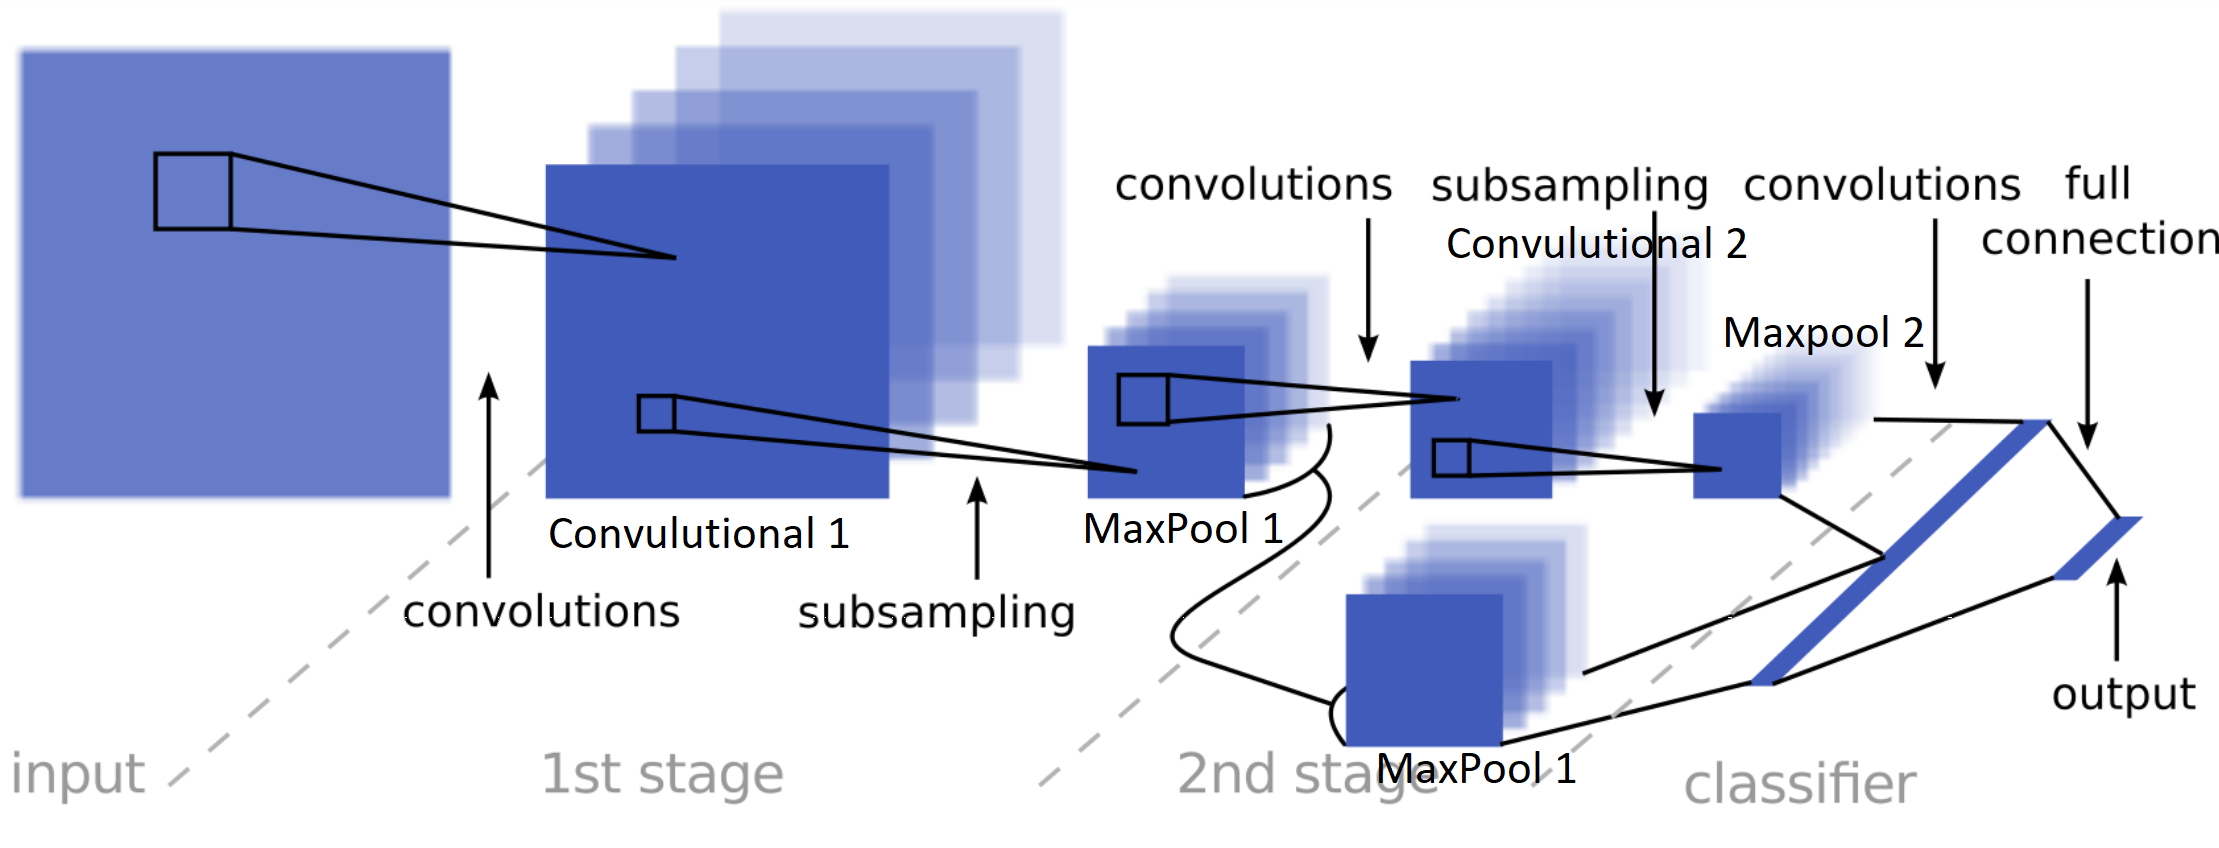

## Revised Architechture 
following guidelines from Sermanet, Pierre & Lecun, Yann. (2011). Traffic sign recognition with multi-scale Convolutional Networks. 2809 - 2813. 10.1109/IJCNN.2011.6033589. 
The idea is to join the two convulutuional layers together before flattening them.

1. Input(32,32,1)
2. Convulutional 1 (28,26,6) and relu
3. Maxpool 1 (14,14,6) 
4. Convulational 2 (10,10,6) and relu
5. Maxpool 2 (5,5,16)
6. Combine Maxpool 1 and Maxpool 2 after flattening them, resulting in 1176+400 = 1576
8. Fully connected layer 1 (120)
9. Dropout 1
10. Fully Connected layer 2 (84)
11. Dropout 2
12. Fully Connected layer 3 (43) (Logits)

In [14]:
# LeNet 2.0 

def LeNet2(x):
    mu =0
    sigma = 0.1
   
    
    # layer 1 Input = 32x32x1. Output = 28x28x6. Pooling. Input = 28x28x6. Output = 14x14x6.
    con1_w=tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma))
    con1_b=tf.Variable(tf.zeros(6))
    con1=tf.nn.conv2d(x,con1_w,strides=[1,1,1,1],padding='VALID')+con1_b
    con1=tf.nn.relu(con1)
    con1=tf.nn.max_pool(con1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    #MaxPool 1
    max1=con1
       
    # layer 2 Output = 10x10x16. Pooling. Input = 10x10x16. Output = 5x5x16.
    con2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    con2_b=tf.Variable(tf.zeros(16))
    con2=tf.nn.conv2d(con1,con2_w,strides=[1,1,1,1],padding='VALID')+con2_b
    con2=tf.nn.relu(con2)
    con2=tf.nn.max_pool(con2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #MaxPool 2
    max2=con2
    
    #flatten max 1 and max 2
    max1=flatten(max1)
    max2=flatten(max2)
    
    
    # Output = 1576.
    fc0=tf.concat([max1,max2], 1)
    
    # fully connected layer Input = 1576. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(1576,120),mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1=tf.matmul(fc0,fc1_w)+fc1_b
    fc1=tf.nn.relu(fc1)
    
    #dropout
    fc1=tf.nn.dropout(fc1,keep_prob)
    
    # fully connected layer Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2=tf.matmul(fc1,fc2_w)+fc2_b
    fc2=tf.nn.relu(fc2)
    
    #dropout
    fc2=tf.nn.dropout(fc2,keep_prob)
    
    # fully connected layer Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3=tf.matmul(fc2,fc3_w)+fc3_b
    
    return fc3


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
Epochs=60
BATCH_SIZE=128
rate=0.0009

In [16]:
x=tf.placeholder(tf.float32,(None,32,32,1))
y=tf.placeholder(tf.int32,(None))
one_hot_y =tf.one_hot(y,43)
keep_prob=tf.placeholder(tf.float32)


In [17]:
#training
logits=LeNet2(x)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
# evaluation
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver = tf.train.Saver()


def evaluate(X_data,y_data):
    num_samples=len(X_data)
   
    
    total_accuracy=0
    
    sess=tf.get_default_session()
    for offset in range(0,num_samples,BATCH_SIZE):
        end = offset+BATCH_SIZE
        batch_x,batch_y =X_data[offset:end],y_data[offset:end]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y,keep_prob: 1.0})
        total_accuracy+=(accuracy*len(batch_x))
    return (total_accuracy/num_samples)

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.



In [19]:
    from sklearn.utils import shuffle

    sess = tf.InteractiveSession()
    sess.as_default()

#with sess:
#with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_samples=len(X_train)
    
    print("Training started")
    for i in range(Epochs):
        X_train,y_train=shuffle(X_train,y_train)
        for offset in range(0,num_samples,BATCH_SIZE):
            end = offset+BATCH_SIZE
            batch_x,batch_y=X_train[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y,keep_prob:0.5})
            
        
        validation_accuracy=evaluate(X_valid,y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, './lenet')
    print("Model saved")

Training started
EPOCH 1 ...
Validation Accuracy = 0.640

EPOCH 2 ...
Validation Accuracy = 0.780

EPOCH 3 ...
Validation Accuracy = 0.833

EPOCH 4 ...
Validation Accuracy = 0.868

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 6 ...
Validation Accuracy = 0.905

EPOCH 7 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.926

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.932

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.934

EPOCH 14 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.936

EPOCH 17 ...
Validation Accuracy = 0.941

EPOCH 18 ...
Validation Accuracy = 0.937

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.948

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.945

EPOCH 24 ...
Validation Ac

# LOG
### 1. Using normalise dot: Validation Accuracy = 0.908
### 2. Using normalise sum: Validation Accuracy =0.898
### 3. Using augmented data: Validation Accuracy = 0.895
### 4. Changes to data augmentation and dropout, increased epochs to 20 from 10 and reduced learning rate to 0.0009: Validation Accuracy = 0.951
### 5. Using normalise dot: Validation Accuracy = 0.949
### 6. Using LeNet 2 and reverting back to normalise sum: Validation Accuracy = 0.955

## Test the Model
Once you are completely satisfied with your model, test the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [20]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

with tf.Session() as sess:
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.934


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(8, 32, 32, 1)


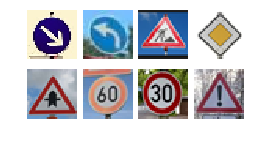

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./My_found_traffic_signs/*x.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

#change this to use my normalisation function
my_images = np.asarray(my_images)

my_images_gry=normaliseImage1(my_images,3,True)

my_images_normalized = my_images_gry

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
my_labels = [38, 34, 25, 12, 11, 3, 1, 18]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)

INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance

In [23]:
### Calculate the accuracy for these 8 new images. 
print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.875


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

INFO:tensorflow:Restoring parameters from ./lenet


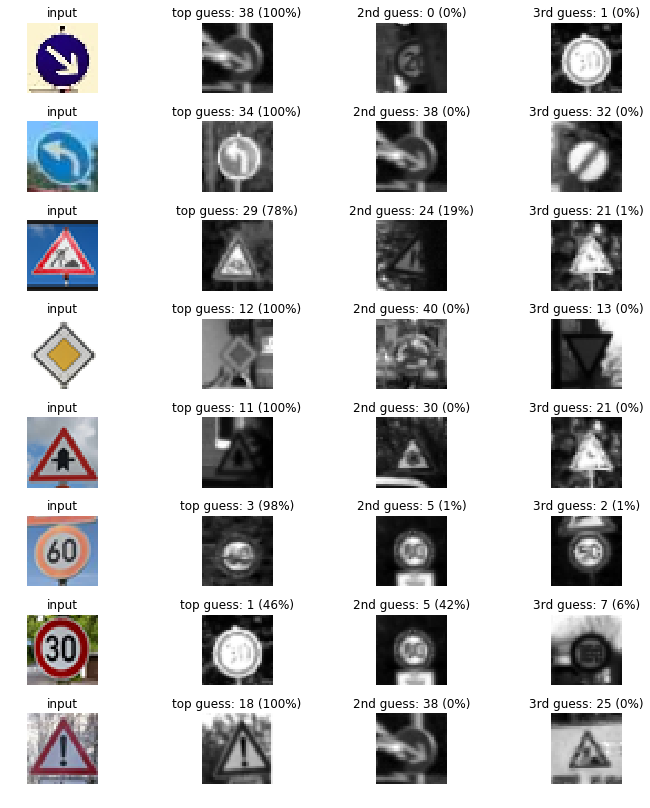

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
    